In [23]:
# conda activate dl1dh_s1
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

from dl1_data_handler.reader import DL1DataReaderSTAGE1, DL1DataReaderDL1DH

In [32]:
def descend_obj(obj, sep='\t', res_str=''):
    """
    Iterate through groups in a HDF5 file and prints the groups and 
    datasets names and datasets attributes
    """
    if type(obj) in [h5py._hl.group.Group, h5py._hl.files.File]:
        for key in obj.keys():
            try:
                res_str += '%s-%s: %s\n' % (sep, key, obj[key])
            except:
                res_str += '%s-%s: %s\n' % (sep, key, 'problem:(')
            res_str = descend_obj(obj[key], sep=sep+sep, res_str=res_str)
    elif type(obj)==h5py._hl.dataset.Dataset:
        for key in obj.attrs.keys():
            try:
                res_str += '%s+%s: %s\n' % (sep+sep, key, obj.attrs[key])
            except:
                res_str += '%s+%s: %s\n' % (sep+sep, key, 'problem here')
    return res_str

In [33]:
mode = 'mlgrid_gamma-diffuse' #'mlgrid_proton', 'mlgrid_gamma-diffuse'
if mode == 'mlgrid_proton':
    folder = '/home/saturn/caph/mpp228/CTA_data/Prod5_GRID/'
    folder += 'Prod5_Paranal_AdvancedBaseline_NSB1x_proton_North_20deg_ctapipe_v0.10.5_DL1/'
    fn0 = 'proton_20deg_0deg_run14656___cta-prod5-paranal_desert-2147m-Paranal-dark_merged.DL1.h5'
elif mode == 'mlgrid_gamma-diffuse':
    folder = '/home/saturn/caph/mpp228/CTA_data/Prod5_GRID/'
    folder += 'Prod5_Paranal_AdvancedBaseline_NSB1x_gamma-diffuse_North_20deg_ctapipe_v0.10.5_DL1/'
    fn0 = 'gamma_20deg_0deg_run5996___cta-prod5-paranal_desert-2147m-Paranal-dark_cone10_merged.DL1.h5'
fn = folder + fn0

In [34]:
h5f = h5py.File(fn, mode='r')

In [27]:
%%time
descr_str = descend_obj(h5f)

CPU times: user 5.93 s, sys: 49.2 ms, total: 5.98 s
Wall time: 5.98 s


In [40]:
h5f['/dl1/event/telescope/'].visit(print)

images
images/tel_001
images/tel_002
images/tel_003
images/tel_004
images/tel_005
images/tel_006
images/tel_007
images/tel_008
images/tel_009
images/tel_010
images/tel_011
images/tel_012
images/tel_013
images/tel_014
images/tel_015
images/tel_016
images/tel_017
images/tel_018
images/tel_019
images/tel_020
images/tel_021
images/tel_022
images/tel_023
images/tel_024
images/tel_025
images/tel_026
images/tel_027
images/tel_028
images/tel_029
images/tel_030
images/tel_031
images/tel_032
images/tel_033
images/tel_034
images/tel_035
images/tel_036
images/tel_037
images/tel_038
images/tel_039
images/tel_040
images/tel_041
images/tel_042
images/tel_043
images/tel_044
images/tel_045
images/tel_046
images/tel_047
images/tel_048
images/tel_049
images/tel_050
images/tel_051
images/tel_052
images/tel_053
images/tel_054
images/tel_055
images/tel_056
images/tel_057
images/tel_058
images/tel_059
images/tel_060
images/tel_061
images/tel_062
images/tel_063
images/tel_064
images/tel_065
images/tel_066
ima

In [35]:
%%time
pars_descr = descend_obj(h5f['/dl1/event/telescope/parameters/tel_001'])

CPU times: user 19.3 ms, sys: 0 ns, total: 19.3 ms
Wall time: 19 ms


In [36]:
print(pars_descr)

		+CLASS: b'TABLE'
		+CTAPIPE_VERSION: b'0.10.3'
		+FIELD_0_FILL: 0
		+FIELD_0_NAME: b'obs_id'
		+FIELD_10_FILL: 0.0
		+FIELD_10_NAME: b'hillas_width'
		+FIELD_11_FILL: 0.0
		+FIELD_11_NAME: b'hillas_width_uncertainty'
		+FIELD_12_FILL: 0.0
		+FIELD_12_NAME: b'hillas_psi'
		+FIELD_13_FILL: 0.0
		+FIELD_13_NAME: b'hillas_skewness'
		+FIELD_14_FILL: 0.0
		+FIELD_14_NAME: b'hillas_kurtosis'
		+FIELD_15_FILL: 0.0
		+FIELD_15_NAME: b'timing_slope'
		+FIELD_16_FILL: 0.0
		+FIELD_16_NAME: b'timing_intercept'
		+FIELD_17_FILL: 0.0
		+FIELD_17_NAME: b'timing_deviation'
		+FIELD_18_FILL: 0.0
		+FIELD_18_NAME: b'leakage_pixels_width_1'
		+FIELD_19_FILL: 0.0
		+FIELD_19_NAME: b'leakage_pixels_width_2'
		+FIELD_1_FILL: 0
		+FIELD_1_NAME: b'event_id'
		+FIELD_20_FILL: 0.0
		+FIELD_20_NAME: b'leakage_intensity_width_1'
		+FIELD_21_FILL: 0.0
		+FIELD_21_NAME: b'leakage_intensity_width_2'
		+FIELD_22_FILL: 0.0
		+FIELD_22_NAME: b'concentration_cog'
		+FIELD_23_FILL: 0.0
		+FIELD_23_NAME: b'concentratio

In [38]:
if not os.path.isdir('tmp'):
    os.mkdir('tmp')
fn_descr = 'tmp/parameter_fields.txt'
with open(fn_descr, 'w') as fl:
    #print(dir(fl))
    fl.write(pars_descr)

In [13]:
print(pars_descr)

	-tel_001: <HDF5 dataset "tel_001": shape (466,), type "|V286">				+CLASS: b'TABLE'				+CTAPIPE_VERSION: b'0.10.3'				+FIELD_0_FILL: 0				+FIELD_0_NAME: b'obs_id'				+FIELD_10_FILL: 0.0				+FIELD_10_NAME: b'hillas_width'				+FIELD_11_FILL: 0.0				+FIELD_11_NAME: b'hillas_width_uncertainty'				+FIELD_12_FILL: 0.0				+FIELD_12_NAME: b'hillas_psi'				+FIELD_13_FILL: 0.0				+FIELD_13_NAME: b'hillas_skewness'				+FIELD_14_FILL: 0.0				+FIELD_14_NAME: b'hillas_kurtosis'				+FIELD_15_FILL: 0.0				+FIELD_15_NAME: b'timing_slope'				+FIELD_16_FILL: 0.0				+FIELD_16_NAME: b'timing_intercept'				+FIELD_17_FILL: 0.0				+FIELD_17_NAME: b'timing_deviation'				+FIELD_18_FILL: 0.0				+FIELD_18_NAME: b'leakage_pixels_width_1'				+FIELD_19_FILL: 0.0				+FIELD_19_NAME: b'leakage_pixels_width_2'				+FIELD_1_FILL: 0				+FIELD_1_NAME: b'event_id'				+FIELD_20_FILL: 0.0				+FIELD_20_NAME: b'leakage_intensity_width_1'				+FIELD_21_FILL: 0.0				+FIELD_21_NAME: b'leakage_intensity_width_2'				+FIELD_22_FILL: 0.

In [20]:
# example derived from /home/woody/caph/mpp228/ML/CTA/dl1-data-handler_stage1/notebooks/dl1reading_stage1.ipynb
LST1_reader = DL1DataReaderSTAGE1([fn],
                                 mode='mono',
                                 #example_identifiers_file="./examples.h5",
                                 selected_telescope_types=["LST_LST_LSTCam"],
                                 selected_telescope_ids = {"LST_LST_LSTCam": [1]},
                                 image_channels = ['image', 'peak_time', 'image_mask'],
                                 parameter_list = ['hillas_intensity', 'hillas_x'],
                                 event_info = ["true_energy", "true_alt", "true_az"])


In [21]:
len(LST1_reader)

466

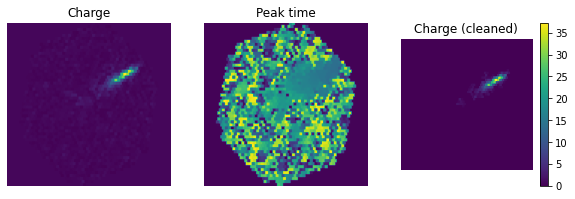

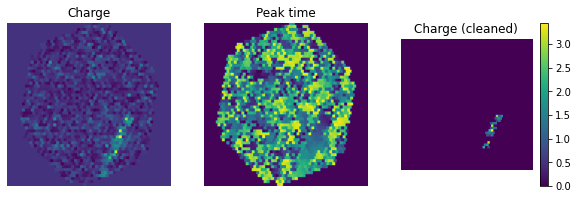

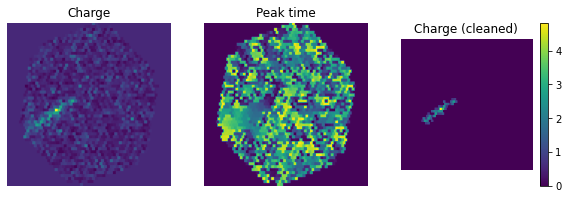

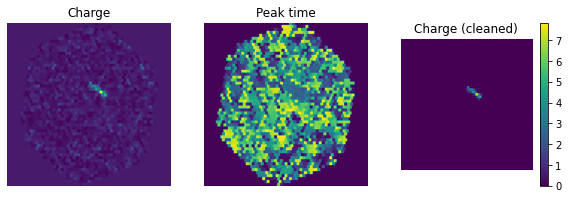

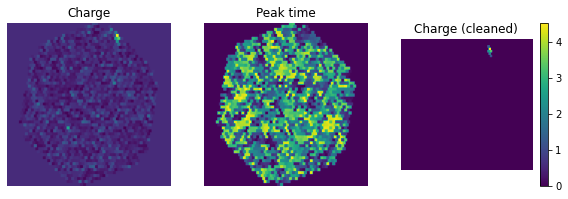

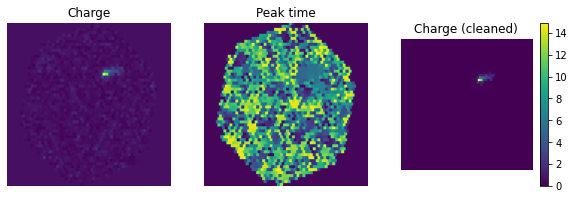

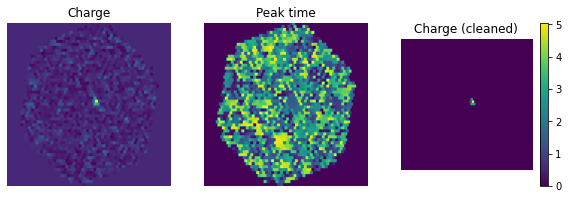

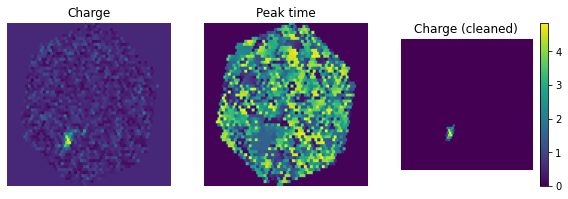

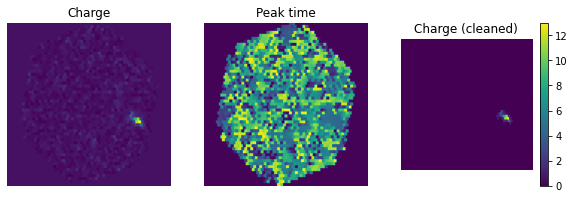

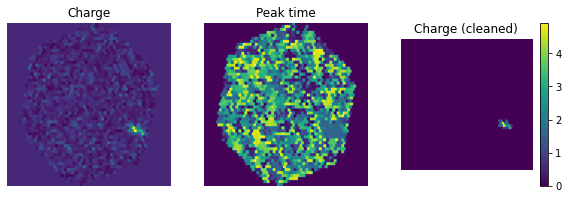

In [43]:
i = 1
NUM_IMAGES_TO_PLOT = len(LST1_reader)
#if i < NUM_IMAGES_TO_PLOT:
for i in range(10):
    example = LST1_reader[i]
    image = example[0]
    if 0:
        print("Event nr. {}".format(i+1))
        print("Parameters: {}".format(example[1]))
        print("true_energy: {}".format(example[2]))
        print("true_alt: {}".format(example[3]))
        print("true_az: {}".format(example[4]))
    plt.figure(figsize=(10, 3))
    #fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    plt.subplot(1, 3, 1)
    #image charge
    ax1 = plt.imshow(image[:,:,0], cmap='viridis')
    plt.title('Charge')
    plt.axis('off')
    #plt.colorbar()
    #plt.axes().set_aspect('equal')
    #plt.show()
    #plt.close()
    #peak time
    plt.subplot(1, 3, 2)
    plt.imshow(image[:,:,1],cmap='viridis')
    plt.title('Peak time')
    plt.axis('off')
    #plt.colorbar()
    #plt.axes().set_aspect('equal')
    #plt.show()
    #plt.close()
    #cleaned image charge
    
    plt.subplot(1, 3, 3)
    plt.imshow(image[:,:,2],cmap='viridis')
    plt.title('Charge (cleaned)')
    plt.axis('off')
    plt.colorbar(shrink=1)
    #plt.axes().set_aspect('equal')
    #plt.show()
    #plt.close()
    


In [30]:
ax1